In [1]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 3: Download IMDb Top 250 movie data
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)

In [3]:
# Step 4: Parse the webpage content
soup = BeautifulSoup(response.text, "html.parser")


In [4]:
# Step 5: Extract movie details
movies = soup.select('td.titleColumn')
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]


In [5]:
# Step 6: Store extracted data in a list
movie_list = []

for index in range(0, len(movies)):
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search(r'\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {
        "place": place,
        "movie_title": movie_title,
        "rating": ratings[index],
        "year": year,
        "star_cast": crew[index],
    }
    movie_list.append(data)

In [6]:
# Step 7: Print extracted data
for movie in movie_list:
    print(movie['place'], '-', movie['movie_title'], '('+movie['year'] + ') -', 'Starring:', movie['star_cast'], movie['rating'])


In [7]:
# Step 7: Save data to a CSV file
df = pd.DataFrame(movie_list)
df.to_csv('imdb_top_250_movies.csv', index=False)
print("\nData has been saved to 'imdb_top_250_movies.csv'")


Data has been saved to 'imdb_top_250_movies.csv'


In [8]:
# Step 8: Save data to a CSV file
df = pd.DataFrame(movie_list)
df.to_csv('imdb_top_250_movies.csv', index=False)

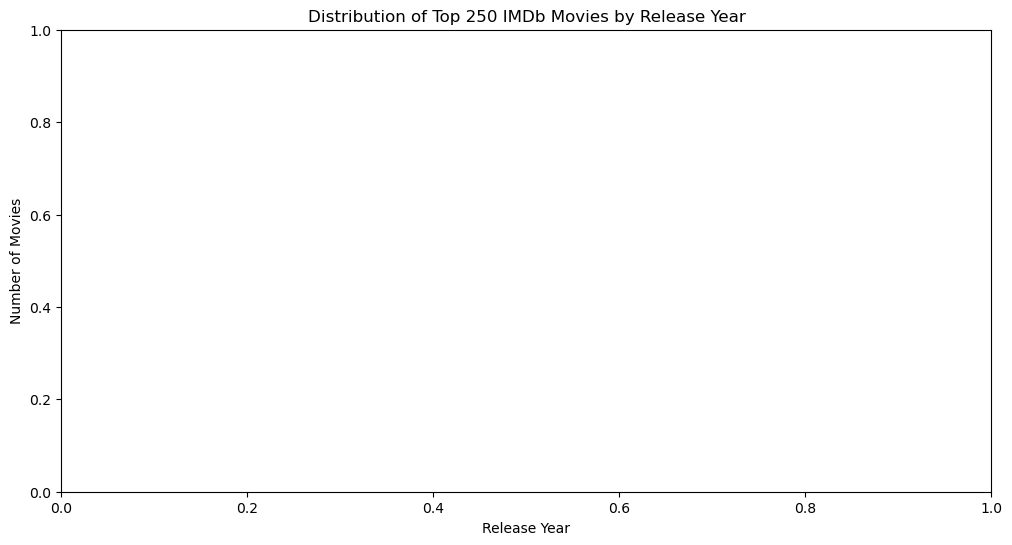

In [15]:
# Step 8: Data Visualization
plt.figure(figsize=(12, 6))
sns.histplot(df['year'], bins=30, kde=True, color='blue')
plt.xlabel("Release Year")
plt.ylabel("Number of Movies")
plt.title("Distribution of Top 250 IMDb Movies by Release Year")
plt.show()

In [12]:
for index in range(0, len(movies)):
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    year_match = re.search(r'\((\d{4})\)', movie_string)
    
    if year_match:
        year = year_match.group(1)
    else:
        year = "Unknown"

    print(f"Extracted Year: {year}")  # Debugging line


In [14]:
df = pd.DataFrame(movie_list)

# If 'year' is missing, manually add it
if 'year' not in df.columns:
    df['year'] = None  # Fallback to avoid KeyError

print(df.head())  # Check if 'year' is now present


Empty DataFrame
Columns: [year]
Index: []


In [18]:
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]

if not ratings:
    print("Error: Ratings list is empty. Check IMDb page structure.")


Error: Ratings list is empty. Check IMDb page structure.


In [28]:
print("Ratings list length:", len(ratings))
print("Sample ratings:", ratings[:5])  # Check first 5 ratings


Ratings list length: 0
Sample ratings: []


In [29]:
print("DataFrame columns:", df.columns)
print(df.head())  # Display first few rows


DataFrame columns: Index(['year'], dtype='object')
Empty DataFrame
Columns: [year]
Index: []


In [35]:
if 'rating' in df.columns:
    df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
    df = df.dropna(subset=['rating'])  # Drop rows with missing ratings
    print("Cleaned Ratings:", df['rating'].head())

    plt.figure(figsize=(12, 6))
    sns.boxplot(x=df['rating'])
    plt.xlabel("IMDB Rating")
    plt.title("Distribution of IMDb Ratings")
    plt.show()
else:
    print("Error: 'rating' column is missing!")


Error: 'rating' column is missing!


In [41]:
# Step 4: Convert to DataFrame & Save CSV
df = pd.DataFrame(movie_list)
df.to_csv('imdb_top_250_movies.csv', index=False)
print("\nData saved to 'imdb_top_250_movies.csv'")


Data saved to 'imdb_top_250_movies.csv'


In [43]:
ratings = [float(span.text.strip()) for span in soup.select('td.ratingColumn strong')]


In [44]:
ratings = []
for tag in soup.select('td.ratingColumn strong'):
    try:
        ratings.append(float(tag.text.strip()))
    except ValueError:
        ratings.append(None)  # Handle missing values gracefully

print("Extracted Ratings:", ratings[:10])  # Debugging


Extracted Ratings: []
